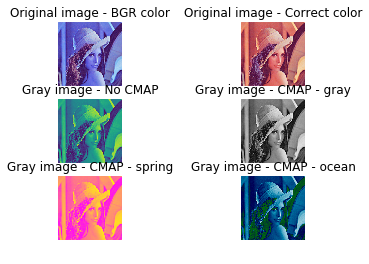

In [28]:
import numpy as np
import urllib
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import keras
import sys

def url2image(url):
    # download the image, convert it to NumPy array then read to OpenCV format
    resp = urlopen(url)
    img = np.asanyarray(bytearray(resp.read()), dtype='uint8')
    img = cv2.imdecode(img, cv2.IMREAD_COLOR)
    return img

if sys.version_info[0] == 3:
    from urllib.request import urlopen
else:
    from urllib import urlopen
    
# MAIN
img_url = 'http://optipng.sourceforge.net/pngtech/img/lena.png'
bgr_img = url2image(img_url)

plt.subplot(3, 2, 1)
plt.axis('off')
plt.title('Original image - BGR color')
plt.imshow(bgr_img)

plt.subplot(3, 2, 2)
plt.axis('off')
plt.title('Original image - Correct color')
plt.imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))
    
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
plt.subplot(3, 2, 3)
plt.axis('off')
plt.title('Gray image - No CMAP')
plt.imshow(gray_img)

gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
plt.subplot(3, 2, 4)
plt.axis('off')
plt.title('Gray image - CMAP - gray')
plt.imshow(gray_img, cmap=plt.get_cmap('gray'))

gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
plt.subplot(3, 2, 5)
plt.axis('off')
plt.title('Gray image - CMAP - spring')
plt.imshow(gray_img, cmap=plt.get_cmap('spring'))

gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
plt.subplot(3, 2, 6)
plt.axis('off')
plt.title('Gray image - CMAP - ocean')
plt.imshow(gray_img, cmap=plt.get_cmap('ocean'))

plt.show()

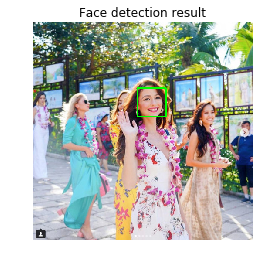

In [29]:
import numpy as np
import urllib
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import keras
import sys
import os.path

def url2image(url):
    # download the image, convert it to NumPy array then read to OpenCV format
    resp = urlopen(url)
    img = np.asanyarray(bytearray(resp.read()), dtype='uint8')
    img = cv2.imdecode(img, cv2.IMREAD_COLOR)
    return img

if sys.version_info[0] == 3:
    from urllib.request import urlopen
else:
    from urllib import urlopen
    
# MAIN
img_url = 'https://image-english.vov.vn/h500/uploaded/tmt2b47lhgly8uzveukg/2018_11_19/c_1_IXLX.jpg'
bgr_img = url2image(img_url)
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

face_classifier_xml = 'my haarcascade_frontalface_default.xml'

ret = os.path.exists(face_classifier_xml)
if ret:
    print ('')
else:
    print ('Downloading...')
    face_classifier_url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
    
    resp = urlopen(face_classifier_url)
    data = resp.read()
    
    # open file for writing
    fh = open(face_classifier_xml,'wb')
    
    # read from request while writing to file
    fh.write(data)
    fh.close()
    resp.close()

face_cascade = cv2.CascadeClassifier(face_classifier_xml)

faces = face_cascade.detectMultiScale(gray_img, 1.25, 3)

for (x, y, w, h) in faces:
    cv2.rectangle(bgr_img, (x,y), (x+w, y+h), (0, 255, 0), 2)
    
plt.axis('off')
plt.title('Face detection result')
plt.imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))
plt.show()